# Averaging Spearman scores across the different binding datasets

## Import the data
We will read the spearman correlation tables generated in step2.
We will read each table into a pandas dataframe for further processing and then intersect them into one dataframe based on the gene names.

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

#read in the files
filenames = [ 'spearmanAVG-1.csv', 'spearmanAVG-2.csv', 'spearmanAVG-3.csv']
dataframes = [ pd.read_csv(f) for f in filenames]

#extract genes names and overlap
gene_sets =  [set(df['Gene Name']) for df in dataframes]
gene_intersect =set.intersection(*gene_sets)

In [4]:
len(gene_intersect)

1107

In [5]:
#extract only those genes from the dataframes that are common to all
dataframes_filtered = [ df.loc[df['Gene Name'].isin(gene_intersect)] for df in dataframes ]
dataframes_filtered = [ df.sort_values('Gene Name') for df in dataframes_filtered ]

In [6]:
#create a dataframe containing all correlations and pvalues
merged_spearman = pd.DataFrame({"Gene Name" :dataframes_filtered[0]['Gene Name'], "Gene ID" :dataframes_filtered[0]['Gene ID']})
cols = { i:df['spearman with target'].values for i,df in zip(filenames,dataframes_filtered)}
merged_spearman = merged_spearman.assign(**cols)
merged_spearman = merged_spearman.assign(average=merged_spearman.mean(axis=1))
merged_spearman = merged_spearman.fillna(0)

merged_pvalues = pd.DataFrame({"Gene Name" :dataframes_filtered[0]['Gene Name'], "Gene ID" :dataframes_filtered[0]['Gene ID']})
cols = { i:df['spearman pvalue'].values for i,df in zip(filenames,dataframes_filtered)}
merged_pvalues = merged_pvalues.assign(**cols)
merged_pvalues = merged_pvalues.assign(average=merged_pvalues.mean(axis=1))
merged_pvalues = merged_pvalues.fillna(0)



In [7]:
#Sort by descending average correlation
sort_idx = list(np.argsort(merged_spearman['average'].values))[::-1]

In [8]:
data = merged_spearman.iloc[list(sort_idx)]
data

,Gene Name,Gene ID,spearmanAVG-1.csv,spearmanAVG-2.csv,spearmanAVG-3.csv,average
5,SLC3A2,ENSG00000168003,0.607113,0.868132,0.857143,0.777463
92,ATP6V1G1,ENSG00000136888,0.301926,0.884615,0.714286,0.633609
3,SLC7A5,ENSG00000103257,0.612982,0.467033,0.642857,0.574291
40,NQO1,ENSG00000181019,0.385396,0.566713,0.750000,0.567370
19,STT3B,ENSG00000163527,0.459234,0.616232,0.612637,0.562701
9,DDIT4,ENSG00000168209,0.530817,0.620879,0.535714,0.562470
170,RPL7,ENSG00000147604,0.223673,0.758242,0.642857,0.541591
2,AUP1,ENSG00000115307,0.614812,0.587912,0.392857,0.531861
99,CTNNB1,ENSG00000168036,0.295405,0.401651,0.892857,0.529971
213,RAD23B,ENSG00000119318,0.194328,0.751032,0.642857,0.529406


In [9]:
data.to_csv( 'Spearman-AVGscores-TPM-AVGfil125.csv')

In [10]:
merged_pvalues.iloc[list(sort_idx)]

,Gene Name,Gene ID,spearmanAVG-1.csv,spearmanAVG-2.csv,spearmanAVG-3.csv,average
5,SLC3A2,ENSG00000168003,0.003516,0.000119,0.013697,0.005778
92,ATP6V1G1,ENSG00000136888,0.183461,0.000059,0.071344,0.084955
3,SLC7A5,ENSG00000103257,0.003131,0.107609,0.119392,0.076711
40,NQO1,ENSG00000181019,0.084466,0.043439,0.052181,0.060029
19,STT3B,ENSG00000163527,0.036240,0.024911,0.143589,0.068246
9,DDIT4,ENSG00000168209,0.013294,0.023538,0.215217,0.084017
170,RPL7,ENSG00000147604,0.329729,0.002666,0.119392,0.150596
2,AUP1,ENSG00000115307,0.003018,0.034586,0.383317,0.140307
99,CTNNB1,ENSG00000168036,0.193578,0.173710,0.006807,0.124698
213,RAD23B,ENSG00000119318,0.398622,0.003087,0.119392,0.173700


# Visualization of the data
We begin by performing t-SNE on the data in order to investigate how the correlation values cluster together. For this, we treat each genes correlation values a one high dimensional data point. 

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0)

In [13]:
X = merged_spearman.values.tolist()
X_labels = np.array([x[0] for x in X])
X_avg = np.array([x[-1] for x in X])
X = np.array([x[2:-1] for x in X])

#filter items with non-positive avg correlation values
temp = np.array(X_avg)
idx = np.argwhere(temp>0)

X_labels = X_labels[idx]
X_avg = X_avg[idx]
X = X[idx]
X = X.reshape((X.shape[0],X.shape[2]))


In [14]:
X_2d = tsne.fit_transform(X)

In [15]:
len(X_2d)

591

<Figure size 936x936 with 0 Axes>

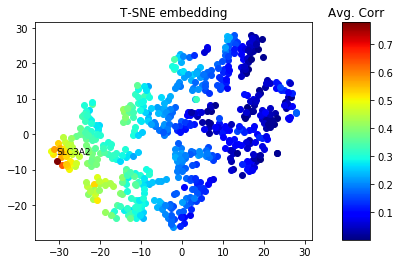

In [16]:
from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib
plt.figure(figsize=(13, 13))

#get color mapping
from matplotlib import cm

#normalize item number values to colormap
norm = matplotlib.colors.Normalize(vmin=min(X_avg), vmax=max(X_avg))
#colormap possible values = viridis, jet, spectral
cmap = cm.jet

f = plt.figure()
gs = gridspec.GridSpec(1, 2,width_ratios=[10,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])


for i in range(len(X_2d)):
    c = list( map( lambda x: x/255., cmap(norm(X_avg[i]),bytes=True)) )
    
    if X_labels[i] == 'SLC3A2':
        ax1.scatter(X_2d[i, 0], X_2d[i, 1], c=c)
        ax1.text(X_2d[i, 0]+0, X_2d[i, 1]+2, "SLC3A2", fontsize=9)
    else:
        ax1.scatter(X_2d[i, 0], X_2d[i, 1], c=c)

matplotlib.colorbar.ColorbarBase(norm=norm, cmap=cmap, ax=ax2)
ax2.set_title("Avg. Corr")
ax1.set_title("T-SNE embedding")

plt.savefig("TSNE_SpearmanAVG.png", dpi=300)
plt.show()

# Gene Correlation Variance vs Average Correlation 

In [18]:
X = merged_spearman.values.tolist()
X_labels = np.array([x[0] for x in X])
X_avg = np.array([x[-1] for x in X])
X = np.array([x[2:-1] for x in X])

#filter items with non-positive avg correlation values
temp = np.array(X_avg)
idx = np.argwhere(temp>-1)

X_labels = X_labels[idx]
X_avg = X_avg[idx]
X = X[idx]
X = X.reshape((X.shape[0],X.shape[2]))
X_var = np.var(X, axis=1)



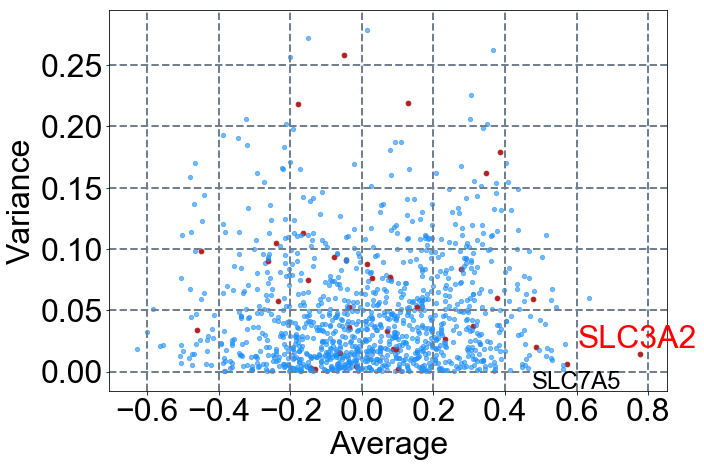

In [19]:
#set font type, this needs to be done BEFORE importing matplotlib
#link https://matplotlib.org/tutorials/introductory/customizing.html
from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
#now we can import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
ax = plt.gca()

for i in range(len(X_var)):
    if X_labels[i] in ['ACTN1', 'AGPAT1', 'AGPAT2', 'AHSA1', 'ALDOC', 'ALG2', 'AMY1A', 'ATP1B3', 'BAG2', 'BCAP31', 'BCKDK', 'BNIP1', 'C7orf50', 'CALD1', 'CAPG', 'CAPZA1', 'CASP14', 'CD14', 'CD151', 'CD97', 'CDS2', 'CHCHD3', 'CLEC14A', 'CLIC1', 'COMT', 'CRIP2', 'CYB561', 'DAP3', 'DBN1', 'DCAF16', 'DCD', 'DDRGK1', 'DHCR7', 'DHRS13', 'DSG1', 'ECHS1', 'EGFR', 'EIF2B2', 'EIF3H', 'EPCAM', 'ERLIN2', 'ETHE1', 'FHL2', 'FLG2', 'GADPH', 'GAR1', 'GIPC1', 'GNAI2', 'GNAI3', 'GOSR2', 'GOT2', 'GPX8', 'GSTO1', 'HAUS2', 'HEXB', 'HLA-A', 'HLA-B', 'HLA-C', 'HM13', 'HNRNPA3', 'HRNR', 'HSD17B10', 'HSPB1', 'ITGA6', 'LANCL2', 'LIMA1', 'LYZ', 'MAGEA4', 'MBOAT7', 'METT5D1', 'MPZL1', 'MRI1', 'MRLP9', 'MRPL16', 'MRPL24', 'MRPS7', 'MT-ND5', 'MTX2', 'MTX3', 'MYADM', 'NSDHL', 'OXA1L', 'PCMT1', 'PDLIM2', 'PEX11B', 'PGRMC2', 'PLEC1', 'PLSCR1', 'PPAPDC2', 'PRDX4', 'PRDX6', 'PTTG1IP', 'PYCRL', 'RAB12', 'RAB27A', 'RAB32', 'RAB5A', 'RAB5B', 'RAB5C', 'RALA', 'RALB', 'RCN1', 'RNH1', 'RPL13A', 'RRAS2', 'S100A8', 'SCAMP3', 'SCO2', 'SDHB', 'SERPINB1', 'SGPP1', 'SLC3A2', 'SLC7A5', 'SNAP23', 'SPC25', 'SRPRB', 'SSSCA1', 'STOML2', 'SYPL1', 'TMED4', 'TMED7', 'TMEM189', 'TMEM33', 'TMEM41B', 'TMEM43', 'TMEM56', 'TMEN175', 'TMOD3', 'TOMM40', 'TPI1', 'TPM1', 'TPM2', 'TSPAN14', 'TSPAN6', 'VPS26A', 'YIPF4', 'ZC3HAV1', 'ZMPSTE24']:
        #same as below
        plt.scatter(X_avg[i], X_var[i], c="firebrick", s=22)
    else:
        #Dot size and transparency can be controlled with parameters given to the scatter function
        #Link: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
        plt.scatter(x=X_avg[i], 
                    y=X_var[i], 
                    c="dodgerblue", #this controls the color of the dots
                    alpha=0.6, #alpha is the opacity. 0 is fully transparent 1 is fully opaque
                    s=18 #this controls the scale (size) of the dots
                   )
        #We highlight the candidates we are more interested in : SLC3A2 and SLC7A5
    if X_labels[i] == 'SLC3A2':
        plt.text(X_avg[i]-0.175, X_var[i]+0.005, "SLC3A2", fontsize=32, color="red")
    if X_labels[i] == 'SLC7A5':
        plt.text(X_avg[i]-0.1, X_var[i]-0.02, "SLC7A5", fontsize=24)
        
plt.xlabel("Average", fontsize=32)
plt.ylabel("Variance", fontsize=32)

plt.savefig("SCATTER_AVG_VAR_TPM-AVG.png", dpi=300)

#This changes the inside background of the plot
#Link is here: https://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
#It also provides an idea of how to choose any color
#ax.set_facecolor('lavender')

#Set the ticklabel size
#Link: https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.setp.html
plt.setp(ax.get_xticklabels(), fontsize=32)
plt.setp(ax.get_yticklabels(), fontsize=32)

#Add a grid 
#Link: https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.grid.html
plt.grid(True, #Set to false to hide the grid
         color='slategrey', #see **kwargs in that link for all the costumization options
         linestyle='--', #see https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle
         linewidth=2
        )

#add plot title
#plt.title("Spearman analysis", fontsize=32)

plt.show()